Carga de librerias

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import scorecardpy as sc 

In [2]:
# Ocultar las advertencias de python
import warnings
warnings.filterwarnings("ignore")

Carga de base de creditos históricos concedidos

In [3]:
bankloan_data=pd.read_csv('bankloan_data.csv')

Vista aleatoria de 5 observaciones/filas

In [4]:
bankloan_data.sample(5)

,customer,Age,Education,Employ,Address,Income,Leverage,Creddebt,OthDebt,MonthlyLoad,Default,OthDebtRatio
445,121595,33,SupInc,3,2.0,46.0,3.8,0.41,1.34,0.12,0,0.029130
647,297345,24,Med,2,3.0,34.0,2.4,0.27,0.54,0.09,0,0.015882
119,60515,30,Bas,6,3.0,22.0,15.5,0.13,3.28,0.86,1,0.149091
1208,375727,25,SupCom,0,3.0,42.0,14.3,0.76,5.24,0.48,1,0.124762
589,244190,57,SupCom,10,10.0,149.0,10.0,3.64,11.26,0.17,0,0.075570


<b>Variables:</b>

    - Customer: ID, o etiqueta única, del solicitante (NO predictivo).
    - Age: Edad del solicitante en años.
    - Education: Nivel máximo de educación alcanzado por el solicitante.
    - Employ: Años en el puesto actual.
    - Address: Años en la dirección actual.
    - Income: Ingresos en miles de dólares.
    - Leverage: Relación deuda/ingresos.
    - CredDebt: Deuda permanente de tarjetas de crédito.
    - OthDebt: Otra deuda en miles de dólares.
    - MonthlyLoad: Porcentaje mensual del salario utilizado para pagar deudas.
    - Default: 1 si se ha producido un valor predeterminado, 0 en caso contrario (variable de destino).

### Análisis Exploratorio

Análisis del Target

In [5]:
bankloan_data['Default'].value_counts()

Default
0    950
1    539
Name: count, dtype: int64

In [6]:
539/(539+950) # Tasa de default = 36%
# 36 de cada 100 terminaron en impagos

0.36198791134989927

In [7]:
bankloan_data['Default'].value_counts(normalize=True)

Default
0    0.638012
1    0.361988
Name: proportion, dtype: float64

Dimensiones del dataframe

In [8]:
bankloan_data.shape

(1489, 12)

Estadísticas descriptivas

In [9]:
bankloan_data.describe()

,customer,Age,Employ,Address,Income,Leverage,Creddebt,OthDebt,MonthlyLoad,Default,OthDebtRatio
count,1489.000000,1489.000000,1489.000000,1489.000000,1489.000000,1489.000000,1489.000000,1489.000000,1489.000000,1489.000000,1489.000000
mean,257649.480188,34.003358,6.799866,6.233714,56.898590,9.904835,1.801370,3.664231,0.366850,0.361988,0.066506
std,139646.983244,12.982437,8.765093,5.987928,55.062182,6.649132,2.340326,4.665854,0.294387,0.480737,0.049231
min,10012.000000,18.000000,0.000000,0.000000,12.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,98410.000000,24.000000,0.000000,2.000000,27.000000,4.800000,0.420000,1.100000,0.150000,0.000000,0.029000
50%,316013.000000,31.000000,4.000000,5.000000,39.000000,8.500000,0.980000,2.200000,0.290000,0.000000,0.054848
75%,370695.000000,41.000000,10.000000,9.000000,63.000000,13.500000,2.170000,4.500000,0.500000,1.000000,0.090714
max,453777.000000,79.000000,63.000000,34.000000,533.000000,40.700000,19.050000,52.650000,2.150000,1.000000,0.306400


Estructura del dataframe

In [10]:
bankloan_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1489 entries, 0 to 1488
Data columns (total 12 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   customer      1489 non-null   int64  
 1   Age           1489 non-null   int64  
 2   Education     1489 non-null   object 
 3   Employ        1489 non-null   int64  
 4   Address       1489 non-null   float64
 5   Income        1489 non-null   float64
 6   Leverage      1489 non-null   float64
 7   Creddebt      1489 non-null   float64
 8   OthDebt       1489 non-null   float64
 9   MonthlyLoad   1489 non-null   float64
 10  Default       1489 non-null   int64  
 11  OthDebtRatio  1489 non-null   float64
dtypes: float64(7), int64(4), object(1)
memory usage: 139.7+ KB


Análisis de Missings

In [11]:
bankloan_data.isnull().sum()

customer        0
Age             0
Education       0
Employ          0
Address         0
Income          0
Leverage        0
Creddebt        0
OthDebt         0
MonthlyLoad     0
Default         0
OthDebtRatio    0
dtype: int64

Análisis Comparativo de Distribuciones

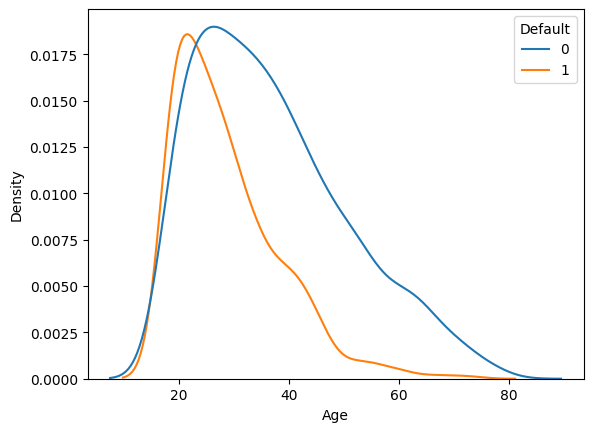

In [12]:
sns.kdeplot(data=bankloan_data,x='Age',hue='Default')
plt.show()

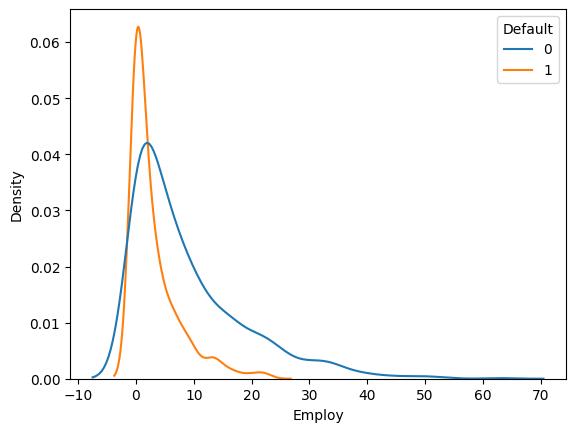

In [13]:
sns.kdeplot(data=bankloan_data,x='Employ',hue='Default')
plt.show()

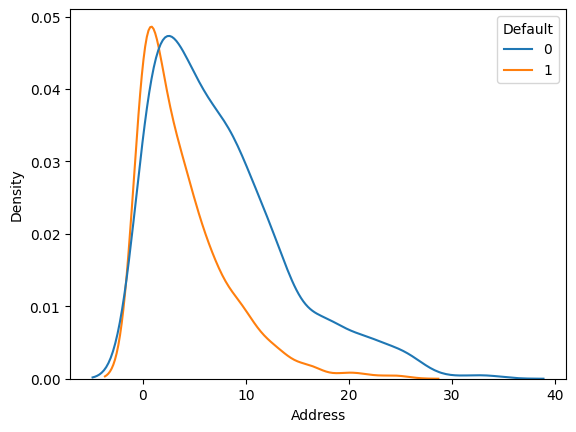

In [14]:
sns.kdeplot(data=bankloan_data,x='Address',hue='Default')
plt.show()

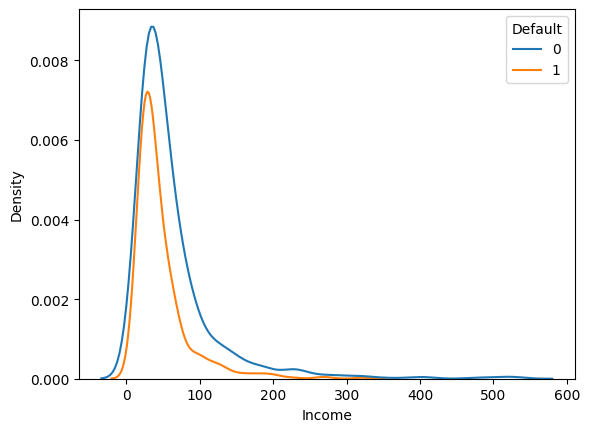

In [15]:
sns.kdeplot(data=bankloan_data,x='Income',hue='Default')
plt.show()

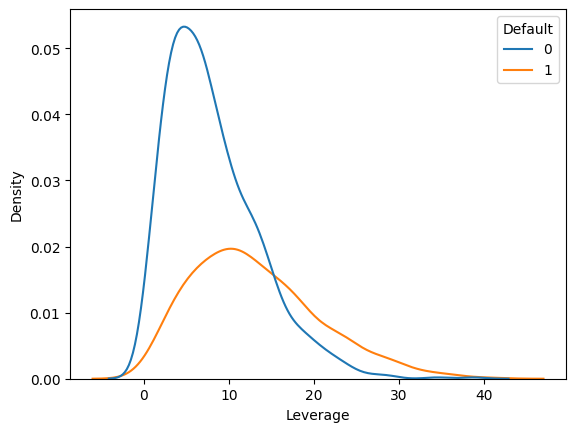

In [16]:
sns.kdeplot(data=bankloan_data,x='Leverage',hue='Default')
plt.show()

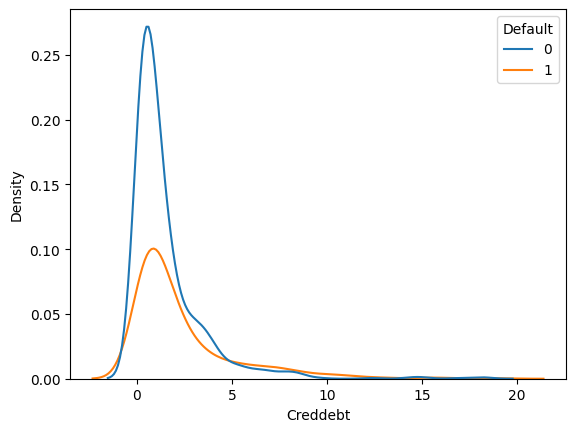

In [17]:
sns.kdeplot(data=bankloan_data,x='Creddebt',hue='Default')
plt.show()

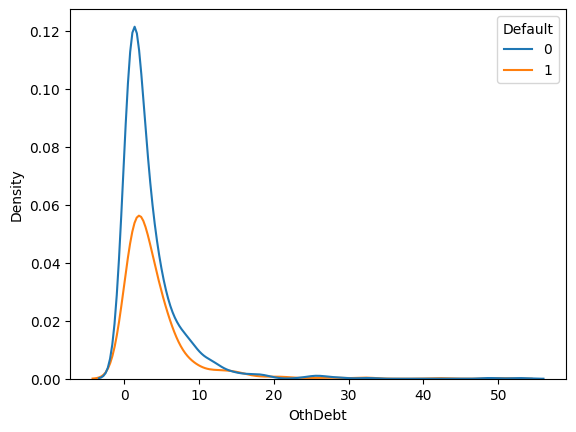

In [18]:
sns.kdeplot(data=bankloan_data,x='OthDebt',hue='Default')
plt.show()

División base de entrenamiento y de testeo

In [19]:
train, test = sc.split_df(bankloan_data.iloc[:,1:],y='Default',ratio=0.7,seed=202407).values()

In [20]:
train.shape # train 70%

(1042, 11)

In [21]:
test.shape # test 30%

(447, 11)

In [22]:
bankloan_data.shape # total 100%

(1489, 12)

In [23]:
print("La base de Train tiene ",train.shape[0], "filas", " y la base de test tiene ",test.shape[0], "filas")

La base de Train tiene  1042 filas  y la base de test tiene  447 filas


Análisis Bivariado

    - La variable continua es agrupada (binning)
    - Verificamos la dirección (pendiente) de la probabilidad de malos
    - Relacion entre la variable predictora y la variable predicha

In [24]:
bins = sc.woebin(train, y='Default', min_perc_fine_bin=0.02, 
                 min_perc_coarse_bin=0.05, stop_limit=0.02,
                 max_num_bin=8,method='tree')

[INFO] creating woe binning ...
Binning on 1042 rows and 11 columns in 00:00:12


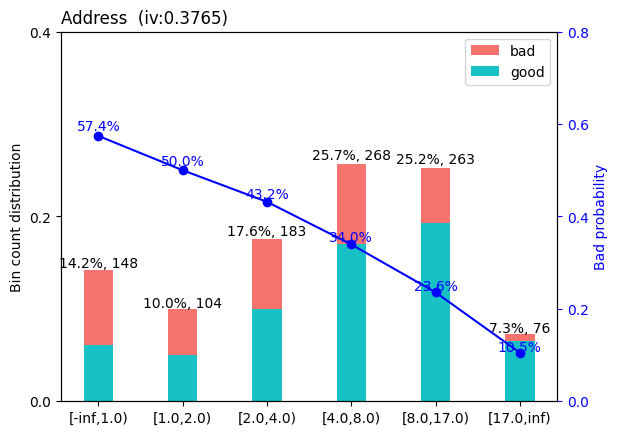

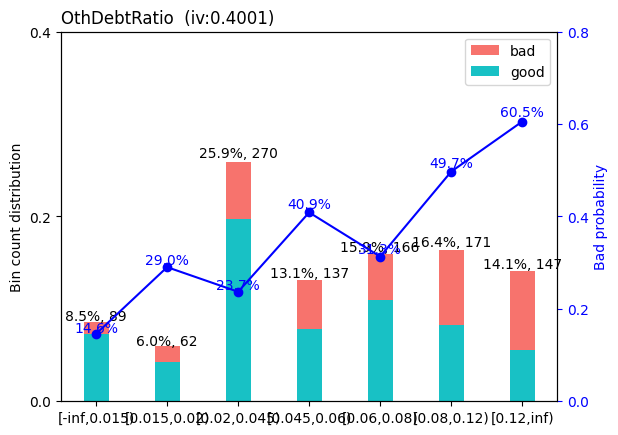

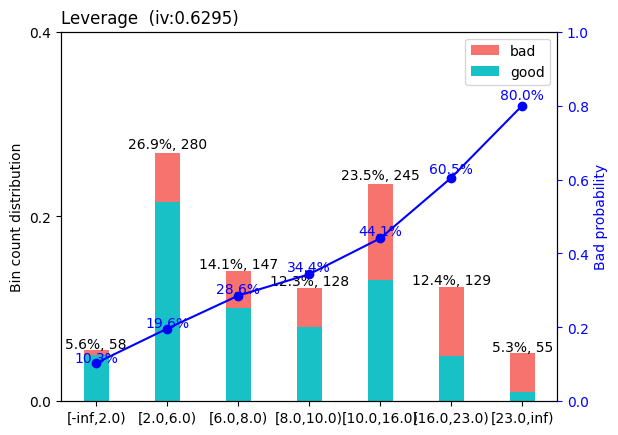

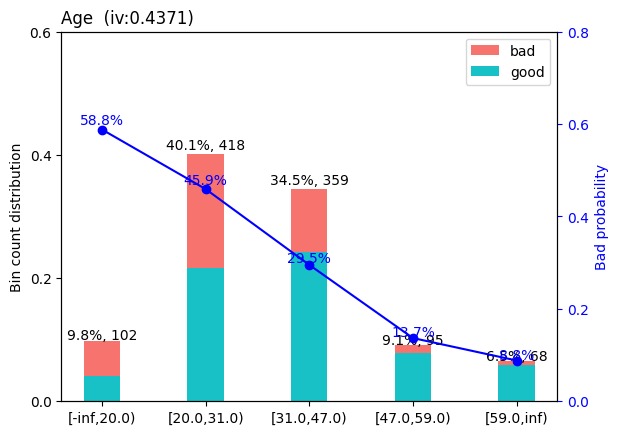

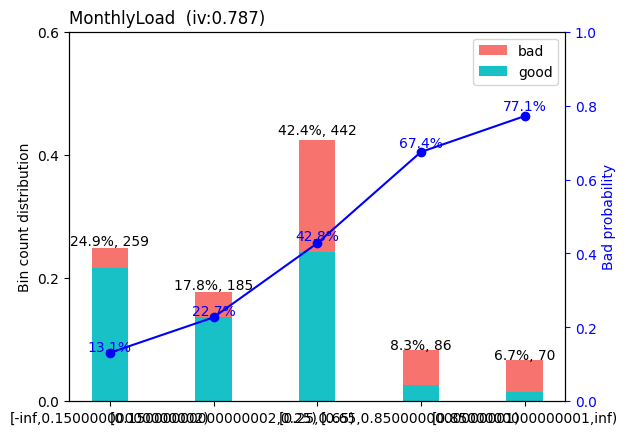

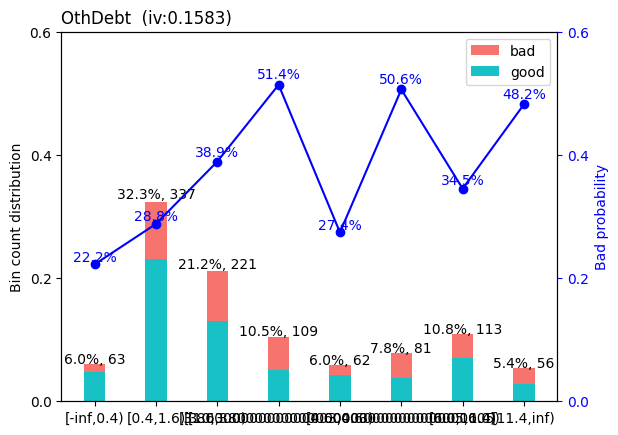

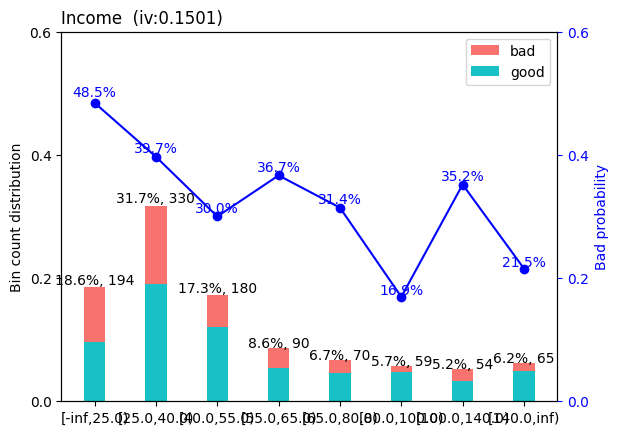

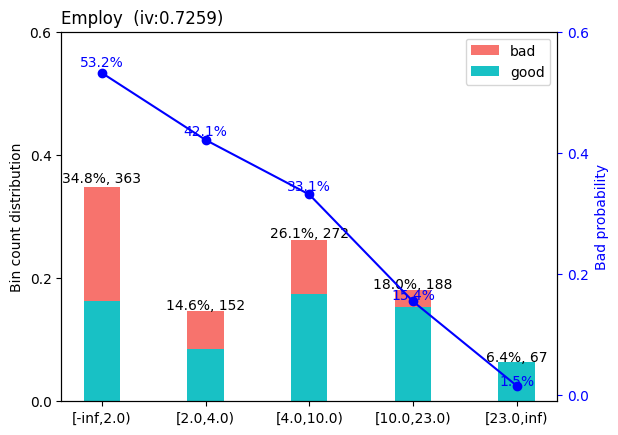

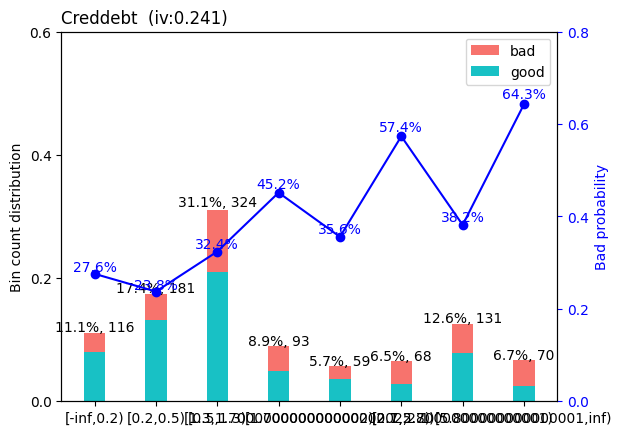

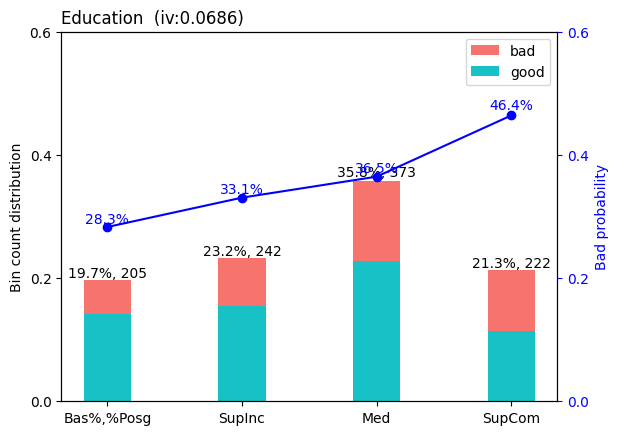

In [25]:
sc.woebin_plot(bins)
plt.show()

Ajuste de bines

In [ ]:
sc.woebin_plot(bins['OthDebt'])    # 0.4 1.6 3.0 4.6
plt.show()

In [ ]:
bins['OthDebt']

In [ ]:
sc.woebin_plot(bins['Income'])    # 25 40 80 140
plt.show()

In [ ]:
bins['Income'] # 25 40 80 140

In [ ]:
sc.woebin_plot(bins['Creddebt'])    # 0.5 1.7 2.7
plt.show()

In [ ]:
bins['Creddebt']  # 0.5 1.7 2.7

In [ ]:
sc.woebin_plot(bins['OthDebtRatio'])    # 0.015 0.02 0.06 0.08 0.12
plt.show()

In [ ]:
bins['OthDebtRatio']

Corrección Manual de los intervalos

In [26]:
ajustes = {'OthDebt': [0.4,1.6,3.0],
           'Income': [25,40,80,140],
           'Creddebt': [0.5,1.7],
           'OthDebtRatio': [0.015,0.08,0.12]           
          }

In [27]:
bins_adj = sc.woebin(train, y='Default', 
                 min_perc_fine_bin=0.02,  
                 min_perc_coarse_bin=0.05,   
                 stop_limit=0.02,  
                 max_num_bin=8, 
                 method='tree',
                 breaks_list=ajustes
                )

[INFO] creating woe binning ...


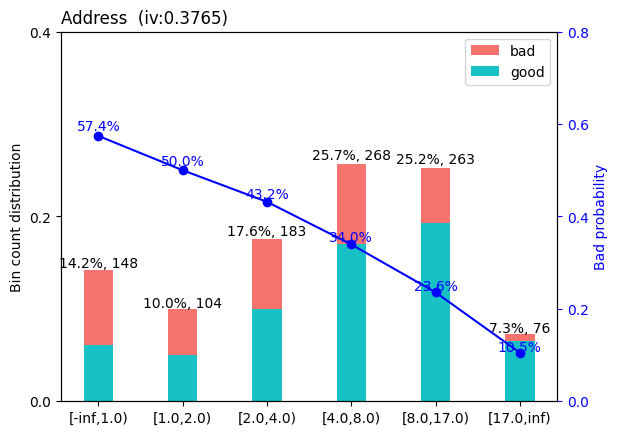

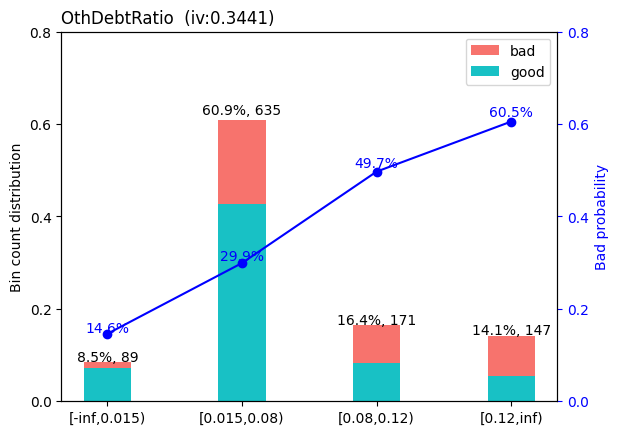

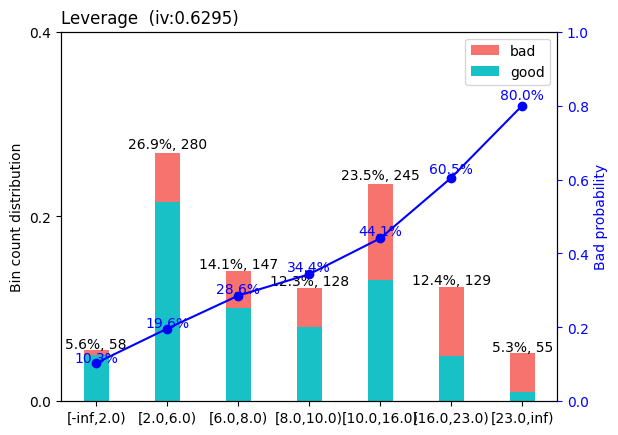

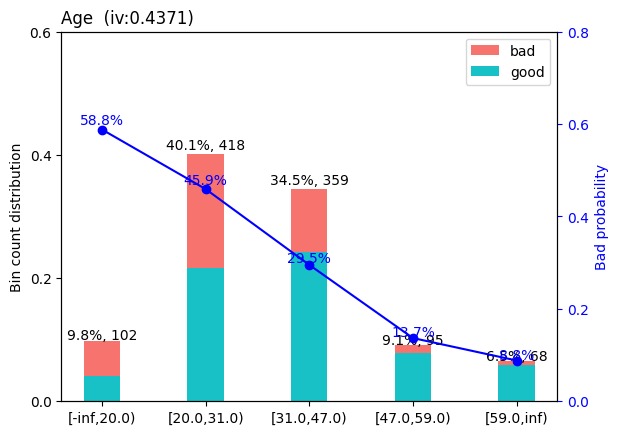

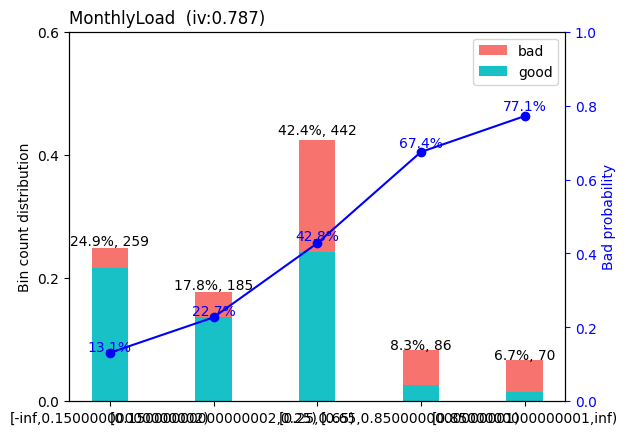

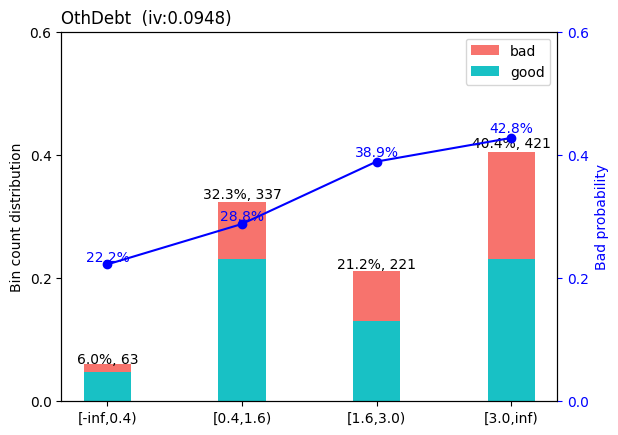

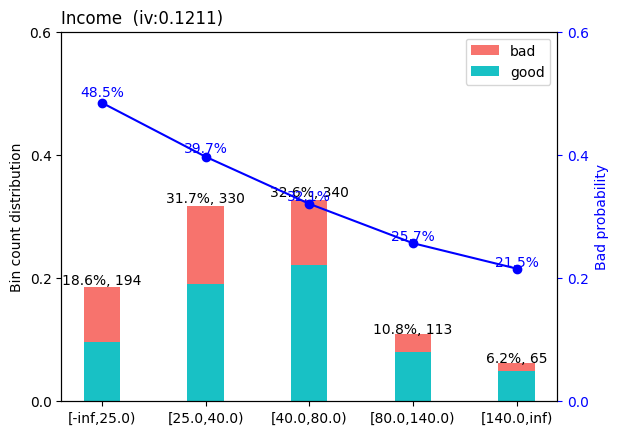

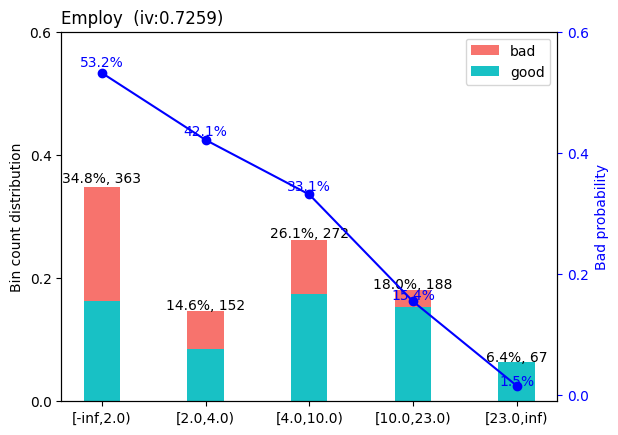

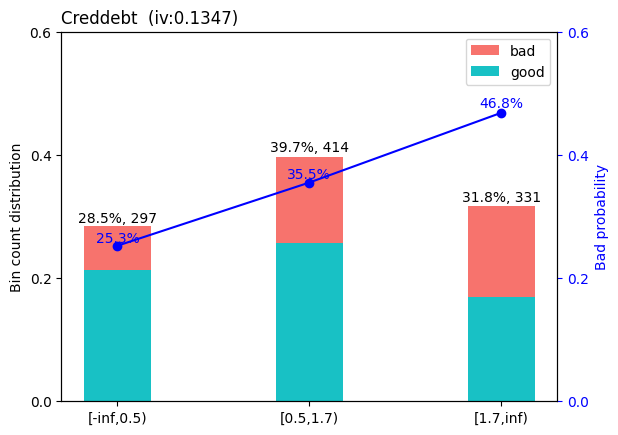

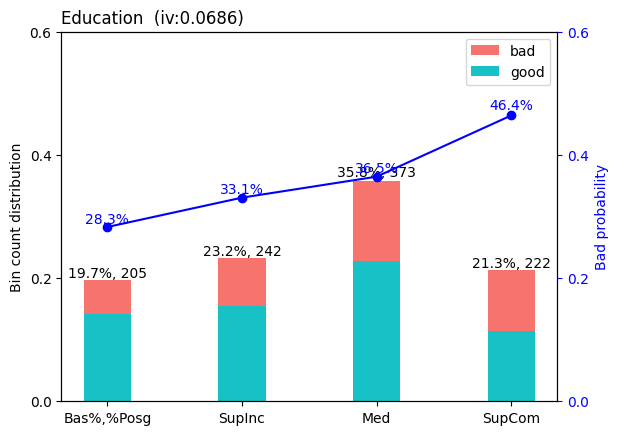

In [28]:
sc.woebin_plot(bins_adj)
plt.show()

In [ ]:
bins_adj['Age']

$WOE=-ln(\frac{DistributionGood_i}{DistributionBad_i})$

In [29]:
train_woe = sc.woebin_ply(train, bins_adj)
test_woe = sc.woebin_ply(test, bins_adj)

[INFO] converting into woe values ...
[INFO] converting into woe values ...


In [30]:
train.head()

,Age,Education,Employ,Address,Income,Leverage,Creddebt,OthDebt,MonthlyLoad,Default,OthDebtRatio
0,28,Med,7,2.0,44.0,17.7,2.99,4.80,0.58,0,0.109091
1,64,Posg,34,17.0,116.0,14.7,5.05,12.00,0.27,0,0.103448
2,40,Bas,20,12.0,61.0,4.8,1.04,1.89,0.13,0,0.030984
3,30,Bas,11,3.0,27.0,34.5,1.75,7.56,1.62,0,0.280000
5,35,Bas,2,9.0,38.0,10.9,1.46,2.68,0.40,1,0.070526


In [31]:
train_woe.head()

,Default,Address_woe,OthDebtRatio_woe,Leverage_woe,Age_woe,MonthlyLoad_woe,OthDebt_woe,Income_woe,Employ_woe,Creddebt_woe,Education_woe
0,0,0.292599,0.555846,0.992425,0.404502,0.275899,0.275702,-0.183528,-0.136655,0.440483,0.012137
1,0,-1.572524,0.555846,0.329692,-1.767833,0.275899,0.275702,-0.495979,-3.622113,0.440483,-0.362448
2,0,-0.608629,-0.283508,-0.841225,-0.302409,-1.322198,0.116614,-0.183528,-1.134067,-0.029274,-0.362448
3,0,0.292599,0.995735,1.953836,0.404502,1.783937,0.275702,0.149434,-1.134067,0.440483,-0.362448
5,1,-0.608629,-0.283508,0.329692,-0.302409,0.275899,0.116614,0.149434,0.249088,-0.029274,-0.362448


#### Information Value

$$IV=\sum_{i=1}^{n}(DistributionGood_i-DistributionBad_i)\times ln(\frac{DistributionGood_i}{DistributionBad_i})$$

<b>Information Value       (Poder Predictivo)

<2%	                      Inútil para la predicción

[2% al 10%]	              Predictor débil

<10% al 30%]	          Predictor medio

<30% al 50%]	          Predictor fuerte

+50%	                  Sospechoso o demasiado bueno para ser verdad

In [32]:
iv_df = pd.DataFrame(sc.iv(train_woe, 'Default'))

In [33]:
iv_df

,variable,info_value
8,MonthlyLoad_woe,0.787012
3,Employ_woe,0.725879
4,Leverage_woe,0.629479
6,Age_woe,0.437149
9,Address_woe,0.376526
2,OthDebtRatio_woe,0.344118
5,Creddebt_woe,0.134689
7,Income_woe,0.121123
0,OthDebt_woe,0.094750
1,Education_woe,0.068634


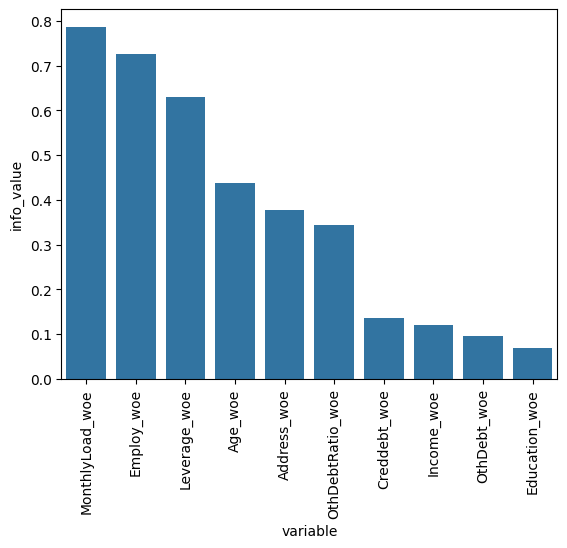

In [34]:
sns.barplot(x="variable", y="info_value", data=iv_df) 
plt.xticks(rotation=90) 
plt.show()

#### Matriz de Correlaciones

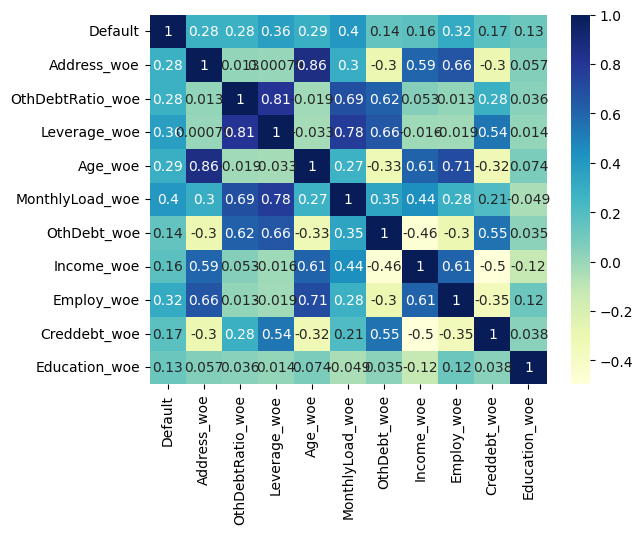

In [35]:
sns.heatmap(train_woe.corr(), cmap="YlGnBu", annot=True)
plt.show()

Selecciona variables a utilizar

In [36]:
train_woe=train_woe[['Default', 'Employ_woe','Education_woe', 'Creddebt_woe', 'Income_woe','MonthlyLoad_woe']]
test_woe=test_woe[['Default', 'Employ_woe','Education_woe', 'Creddebt_woe', 'Income_woe','MonthlyLoad_woe']]

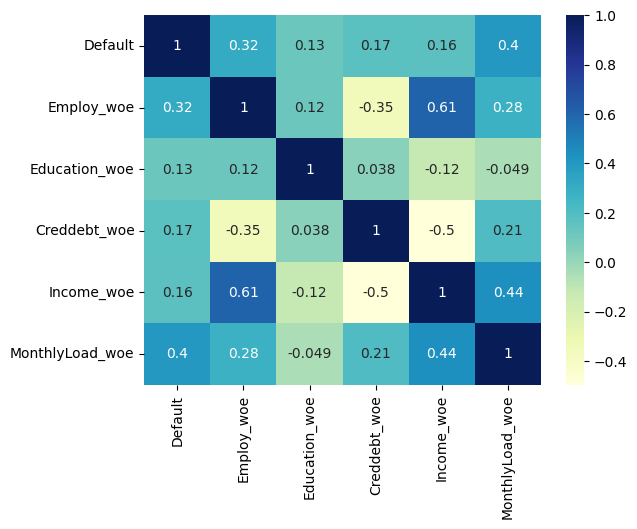

In [37]:
sns.heatmap(train_woe.corr(), cmap="YlGnBu", annot=True)
plt.show()

In [38]:
y_train = train_woe.loc[:,'Default']
x_train = train_woe.loc[:,train_woe.columns != 'Default']
y_test = test_woe.loc[:,'Default']
x_test = test_woe.loc[:,train_woe.columns != 'Default']

In [39]:
x_train.head()

,Employ_woe,Education_woe,Creddebt_woe,Income_woe,MonthlyLoad_woe
0,-0.136655,0.012137,0.440483,-0.183528,0.275899
1,-3.622113,-0.362448,0.440483,-0.495979,0.275899
2,-1.134067,-0.362448,-0.029274,-0.183528,-1.322198
3,-1.134067,-0.362448,0.440483,0.149434,1.783937
5,0.249088,-0.362448,-0.029274,0.149434,0.275899


#### Modelamiento

Se utiliza la regresión logística con las variables transformadas (woeizadas)

In [40]:
from sklearn.linear_model import LogisticRegression
lr = LogisticRegression(penalty='l1', C=1.0, solver='saga', n_jobs=-1,random_state=123)
lr.fit(x_train, y_train)

LogisticRegression(n_jobs=-1, penalty='l1', random_state=123, solver='saga')

In [41]:
train_pred = lr.predict_proba(x_train)[:,1]
test_pred = lr.predict_proba(x_test)[:,1]

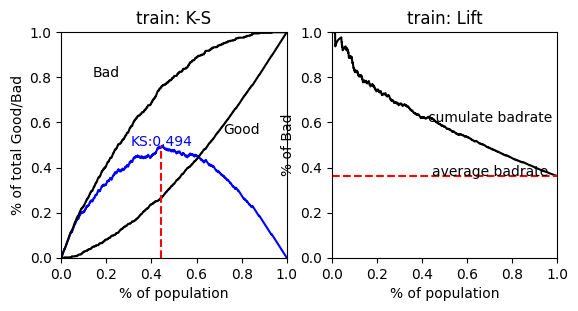

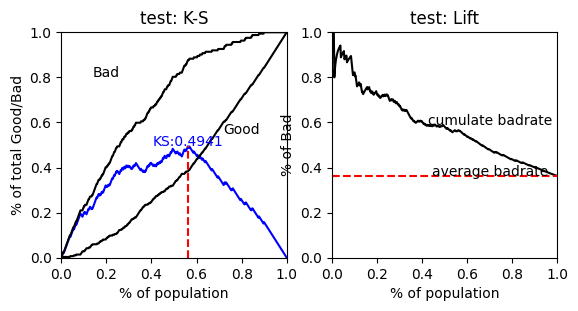

In [42]:
train_perf = sc.perf_eva(y_train, train_pred, plot_type = ["ks","lift"],title = "train")
test_perf = sc.perf_eva(y_test, test_pred, plot_type = ["ks","lift"],title = "test")

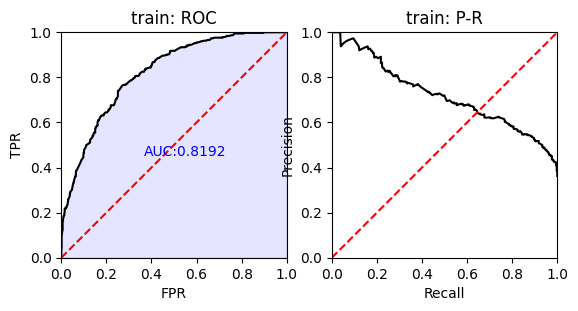

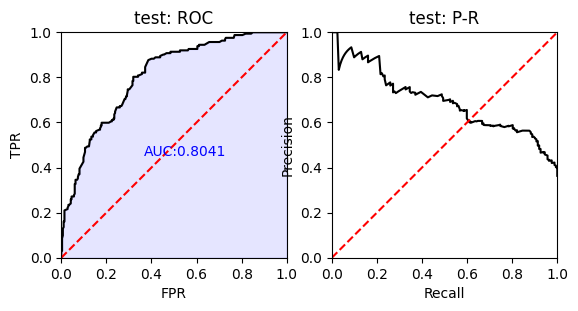

In [43]:
train_perf = sc.perf_eva(y_train, train_pred, plot_type = ["roc","pr"],title = "train")
test_perf = sc.perf_eva(y_test, test_pred, plot_type = ["roc","pr"],title = "test")

Elaboración del Scorecard

In [44]:
card = sc.scorecard(bins_adj, lr, x_train.columns,points0=600,odds0=0.01,pdo=50)

In [45]:
card

{'basepoints':      variable  bin  points
 0  basepoints  NaN   309.0,
 'Employ':    variable          bin  points
 36   Employ   [-inf,2.0)   -68.0
 37   Employ    [2.0,4.0)   -24.0
 38   Employ   [4.0,10.0)    13.0
 39   Employ  [10.0,23.0)   110.0
 40   Employ   [23.0,inf)   353.0,
 'Education':      variable         bin  points
 44  Education  Bas%,%Posg    18.0
 45  Education      SupInc     7.0
 46  Education         Med    -1.0
 47  Education      SupCom   -21.0,
 'Creddebt':     variable         bin  points
 41  Creddebt  [-inf,0.5)    57.0
 42  Creddebt   [0.5,1.7)     3.0
 43  Creddebt   [1.7,inf)   -48.0,
 'Income':    variable           bin  points
 31   Income   [-inf,25.0)    24.0
 32   Income   [25.0,40.0)     7.0
 33   Income   [40.0,80.0)    -9.0
 34   Income  [80.0,140.0)   -23.0
 35   Income   [140.0,inf)   -34.0,
 'MonthlyLoad':        variable                         bin  points
 22  MonthlyLoad  [-inf,0.15000000000000002)    81.0
 23  MonthlyLoad  [0.1500000000000

In [46]:
card['MonthlyLoad']

,variable,bin,points
22,MonthlyLoad,"[-inf,0.15000000000000002)",81.0
23,MonthlyLoad,"[0.15000000000000002,0.25)",40.0
24,MonthlyLoad,"[0.25,0.65)",-17.0
25,MonthlyLoad,"[0.65,0.8500000000000001)",-79.0
26,MonthlyLoad,"[0.8500000000000001,inf)",-109.0


In [47]:
train_score = sc.scorecard_ply(train, card, print_step=0)
test_score = sc.scorecard_ply(test, card, print_step=0)

In [48]:
test_score.describe()

,score
count,447.000000
mean,339.492170
std,129.891139
min,84.000000
25%,247.000000
50%,325.000000
75%,402.000000
max,809.000000


In [49]:
test_score.head()

,score
4,204.0
14,266.0
21,333.0
23,310.0
26,185.0


In [50]:
test_score_points = sc.scorecard_ply(test, card,only_total_score = False)

In [51]:
card['basepoints']

,variable,bin,points
0,basepoints,NaN,309.0


In [52]:
test_score_points.head(40)

,Employ_points,Education_points,Creddebt_points,Income_points,MonthlyLoad_points,score
4,-24.0,18.0,3.0,7.0,-109.0,204.0
14,13.0,18.0,-48.0,-9.0,-17.0,266.0
21,13.0,18.0,3.0,7.0,-17.0,333.0
23,110.0,-21.0,-48.0,-23.0,-17.0,310.0
26,-68.0,18.0,-48.0,-9.0,-17.0,185.0
27,110.0,7.0,3.0,-9.0,81.0,501.0
28,353.0,-1.0,3.0,-9.0,-17.0,638.0
31,-68.0,-1.0,57.0,24.0,81.0,402.0
36,13.0,18.0,-48.0,-9.0,-17.0,266.0
37,13.0,-21.0,3.0,-34.0,81.0,351.0


<b>PSI:

${Population Stability Index (PSI)} = \sum_{i=1}^{n} \frac{(p_i - q_i) \cdot \ln\left(\frac{p_i}{q_i}\right)}{100}$
    
Donde:

n es el número de segmentos o categorías en los que se divide la población.

pi  es la proporción de observaciones en el grupo o segmento i en un periodo base (por ejemplo, la población de referencia).

q i es la proporción de observaciones en el grupo o segmento i en un periodo de comparación (por ejemplo, la población actual).
    
<b>Intepretación:

PSI < 0.1: Cambios no significativos, las poblaciones son estables!

0.1 <= PSI < 0.25: Cambios moderados considere algunos ajustes.

PSI >= 0.25: Cambios significatios,el modelo es inestable y necesita una actualización

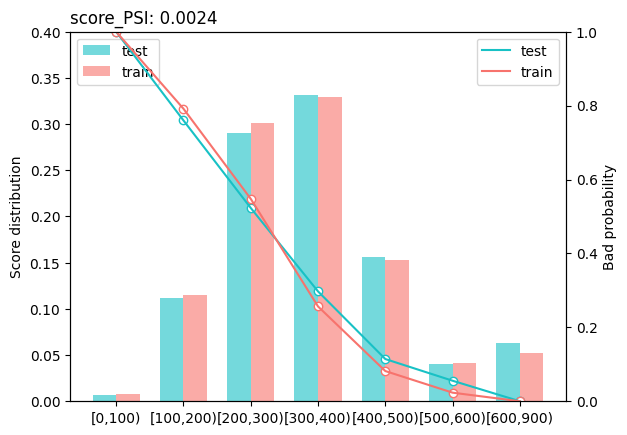

In [53]:
sc.perf_psi(
  score = {'train':train_score, 'test':test_score},
  label = {'train':y_train, 'test':y_test},x_tick_break=100
)
plt.show()

#### Puntos de Corte

In [54]:
df_decil=pd.concat([test_score,y_test],axis=1)

In [55]:
df_decil.head()

,score,Default
4,204.0,1
14,266.0,0
21,333.0,0
23,310.0,1
26,185.0,1


In [56]:
df_decil['decile'] = pd.qcut(df_decil['score'],10,labels=['10','9','8','7','6','5','4','3','2','1'])

In [57]:
df_decil.to_csv('Decil_Puntajes.csv',index=False,sep=';')

In [58]:
df_decil

,score,Default,decile
4,204.0,1,9
14,266.0,0,7
21,333.0,0,5
23,310.0,1,6
26,185.0,1,10
...,...,...,...
1463,404.0,0,3
1468,389.0,0,3
1470,217.0,1,9
1480,320.0,1,6
